In [25]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt


In [26]:
n_data = torch.ones(100,2)
x0 = torch.normal(2*n_data,1)   #第一个类别的 x 数据
y0 = torch.zeros(100)           #第一个类别的 y 数据
x1 = torch.normal(-2*n_data,1)      #第二个类别的 x 数据
y1 = torch.ones(100)                #第二个类别的 y 数据
x = torch.cat((x0,x1),0).type(torch.FloatTensor)
y = torch.cat((y0,y1),).type(torch.LongTensor)

Net(
  (hidden): Linear(in_features=2, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=2, bias=True)
)


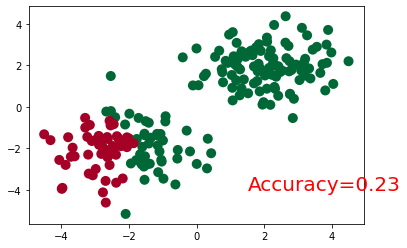

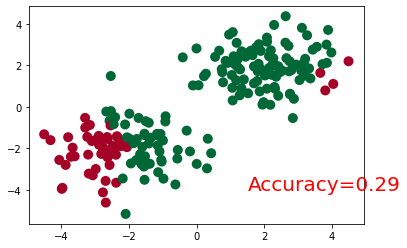

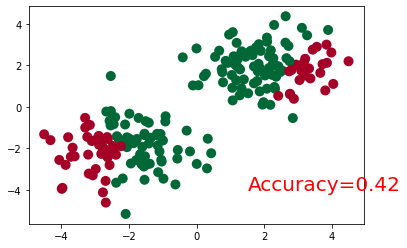

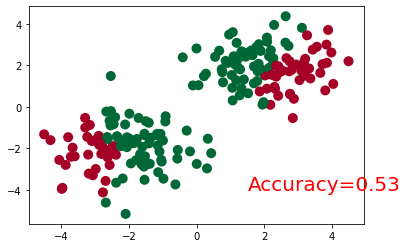

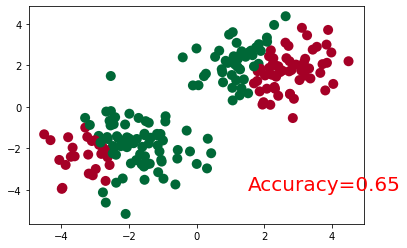

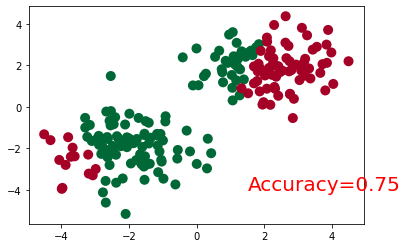

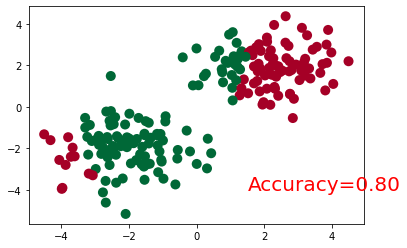

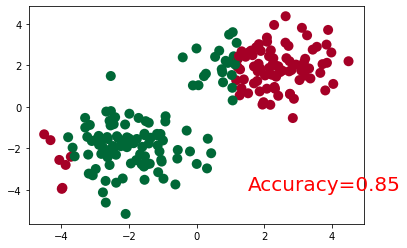

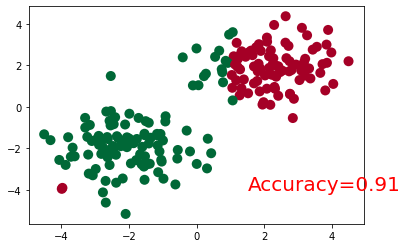

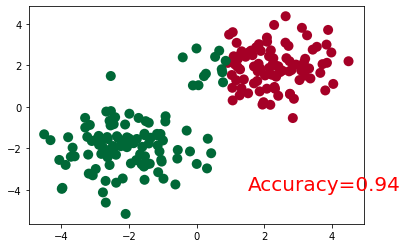

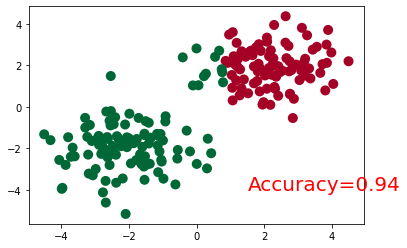

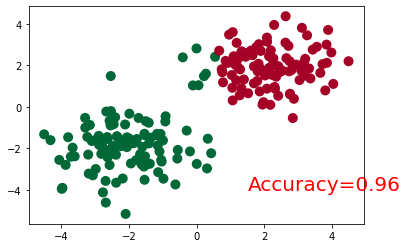

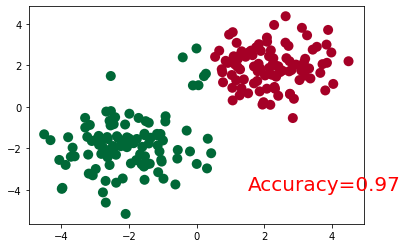

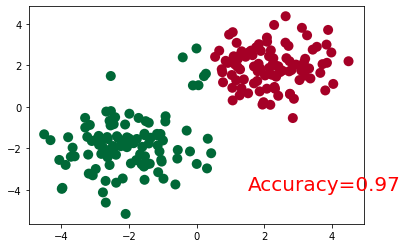

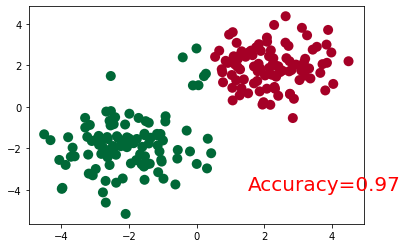

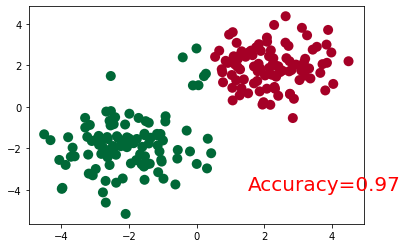

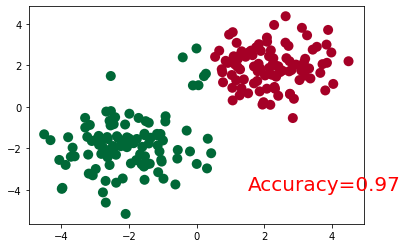

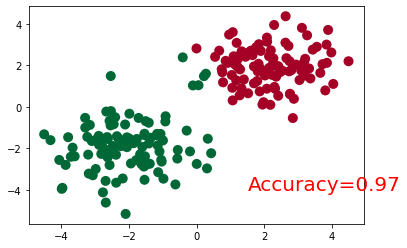

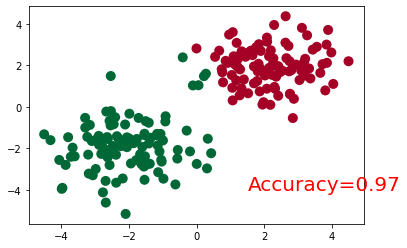

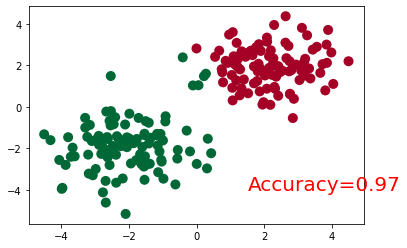

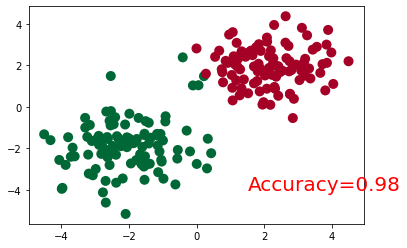

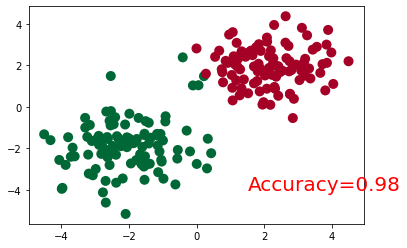

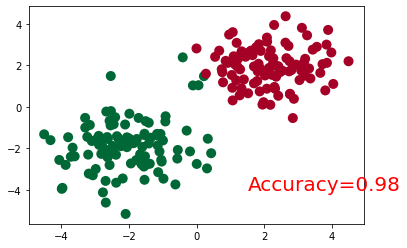

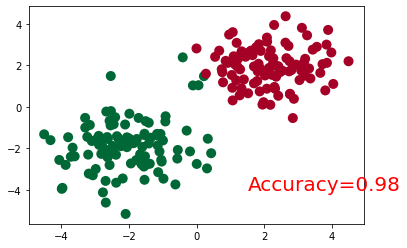

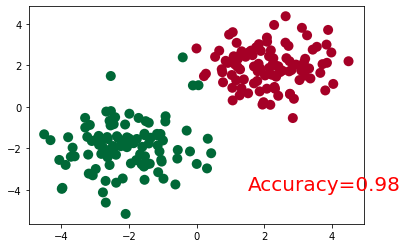

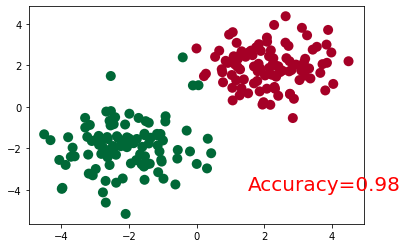

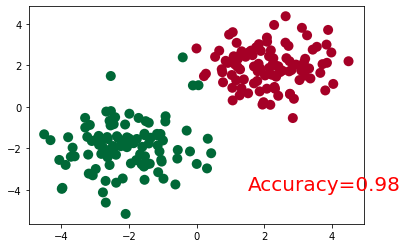

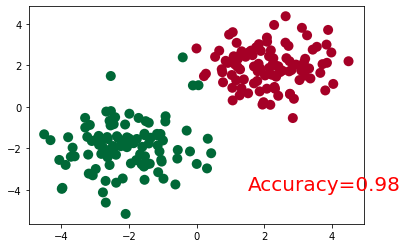

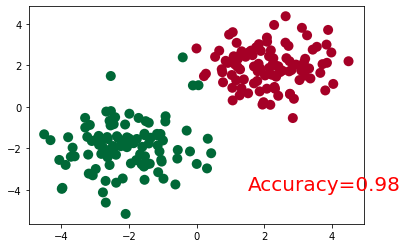

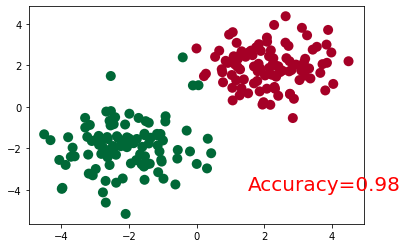

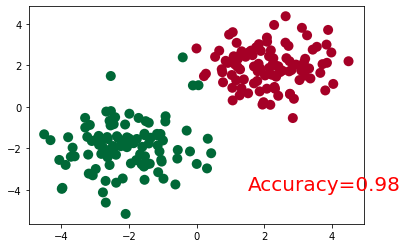

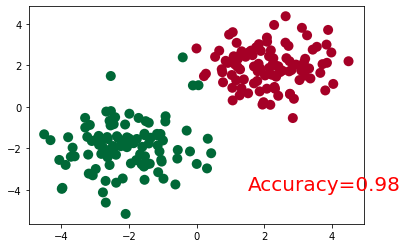

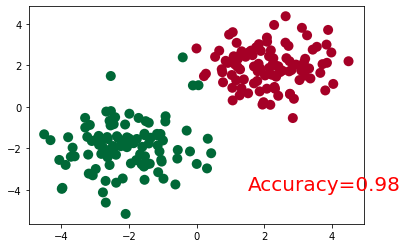

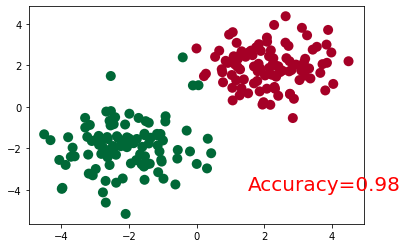

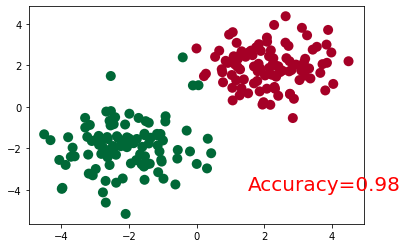

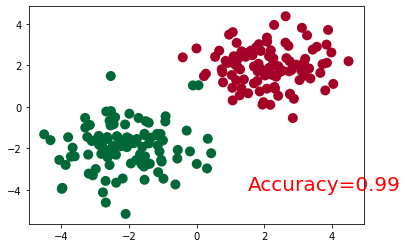

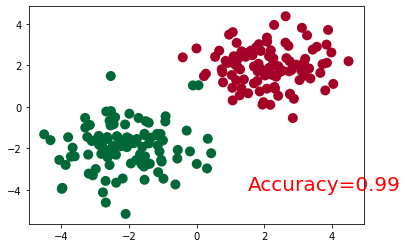

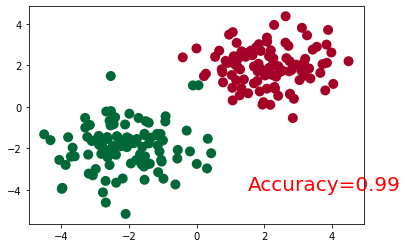

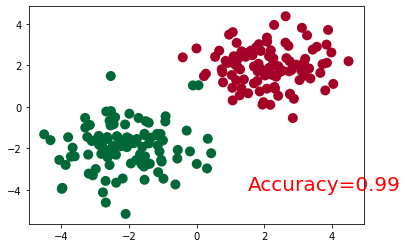

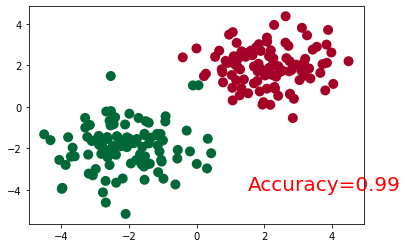

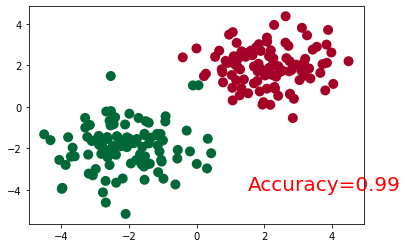

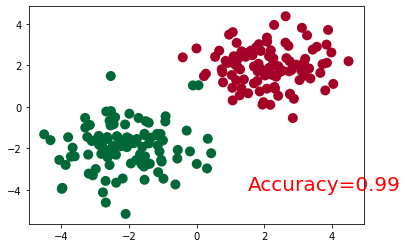

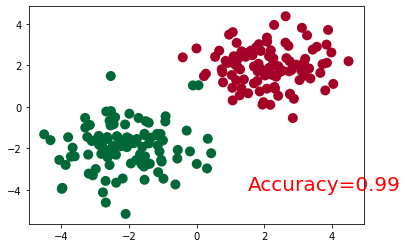

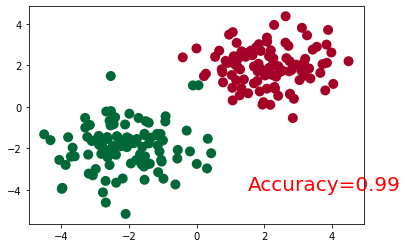

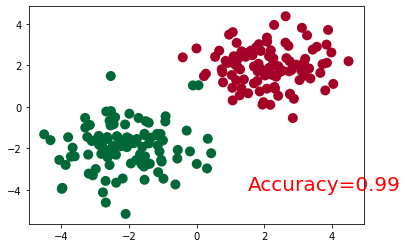

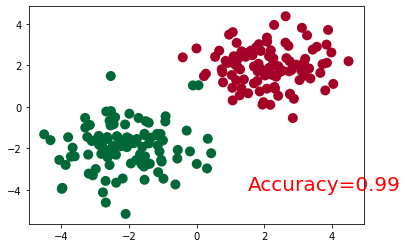

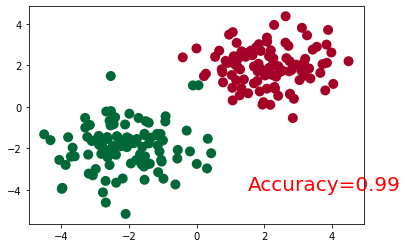

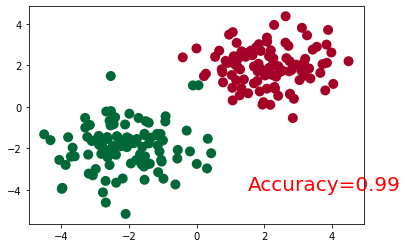

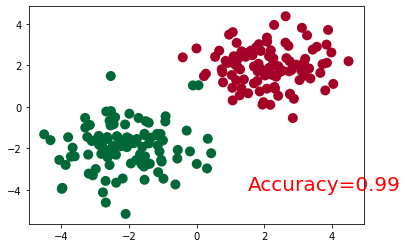

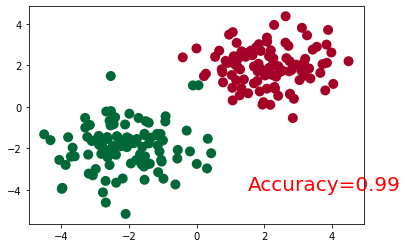

In [27]:
class Net(torch.nn.Module):
    def __init__(self,n_feature,n_hidden,n_output) -> None:
        super(Net,self).__init__()
        #定义隐藏层。隐藏层中的属性就是参数
        self.hidden = torch.nn.Linear(n_feature,n_hidden)
        self.predict = torch.nn.Linear(n_hidden,n_output)

    #x : 输入信息
    def forward(self,x):
        #激励函数激活(嵌套隐藏层输出信息)
        x = F.relu(self.hidden(x))
        #输出层(回归问题一般不需要激励函数，会舍弃了部分负值内容)
        x = self.predict(x)
        return x 

#输入特征2个，默认10个神经元，输出特征2个
net = Net(n_feature=2, n_hidden=10, n_output=2)  #one-hot 编码
print(net)


#net.parameters()：传入神经网络中的参数；指定learning rate（一般小于1）
optimizer = torch.optim.SGD(net.parameters(),lr=0.02)
#处理误差（交叉熵函数） 输出的是概率（满足独立同分布）
loss_func = torch.nn.CrossEntropyLoss()

plt.ion() 

for t in range(100):
    #计算预测值
    prediction = net(x)
    #计算误差（先prediction，后真实值）
    loss = loss_func(prediction,y)
    #先梯度清零
    optimizer.zero_grad()
    #计算结点梯度
    loss.backward()
    #优化梯度
    optimizer.step()
    
    #每两步画一张图
    if t % 2 == 0:
        # plot and show learning process
        plt.cla()
        prediction = torch.max(prediction, 1)[1]  #选取概率最大值的位置作为最终位置，给出值为1的索引
        pred_y = prediction.data.numpy()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')
        accuracy = float((pred_y == target_y).astype(int).sum()) / float(target_y.size)
        plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy, fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)

plt.ioff()
plt.show()